In [ ]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, location, columns, averages, mean_location=None, significant_points=None, timeframe=None, colors=None, save_path=None):
    """
    Plot sentiment scores with highlights and timeframes.

    Parameters:
    daily_sentiment (DataFrame): Data containing sentiment scores.
    title (str): The title of the plot.
    columns (list): The columns from the DataFrame to plot.
    averages (list): Averages for each column to plot as horizontal lines.
    mean_location (float, optional): A location's mean sentiment to be plotted as a horizontal line.
    significant_points (list of str/datetime, optional): Points to be highlighted on the plot.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    colors (list): Colors for each column line and average line.
    save_path (str, optional): Path to save the figure.
    """
    plt.figure(figsize=(15, 8))
    
    # Ensure colors is a list with enough colors
    if not colors or len(colors) < len(columns):
        raise ValueError("Colors list is not provided or does not have enough colors.")
    
    # Plot lines for each sentiment column
    for i, column in enumerate(columns):
        sns.lineplot(x='day', y=column, data=daily_sentiment, color=colors[i], label=f'{column.capitalize()} Sentiment')
        if averages[i] is not None:
            plt.axhline(y=averages[i], color=colors[i], linestyle='--', linewidth=2, label=f'{column.capitalize()} Mean Sentiment({averages[i]:.2f})')

    # Highlight significant points
    if significant_points:
        for point in significant_points:
            plt.scatter(daily_sentiment['day'], daily_sentiment[point], color='red', s=50, zorder=5, label='Significant Point' if point == significant_points[0] else "")

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Significant Period')

    # Plot mean location horizontal line
    if mean_location is not None:
        plt.axhline(y=mean_location, color='green', linestyle='--', linewidth=2, label=f'Mean Sentiment in {location} ({mean_location:.2f})')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


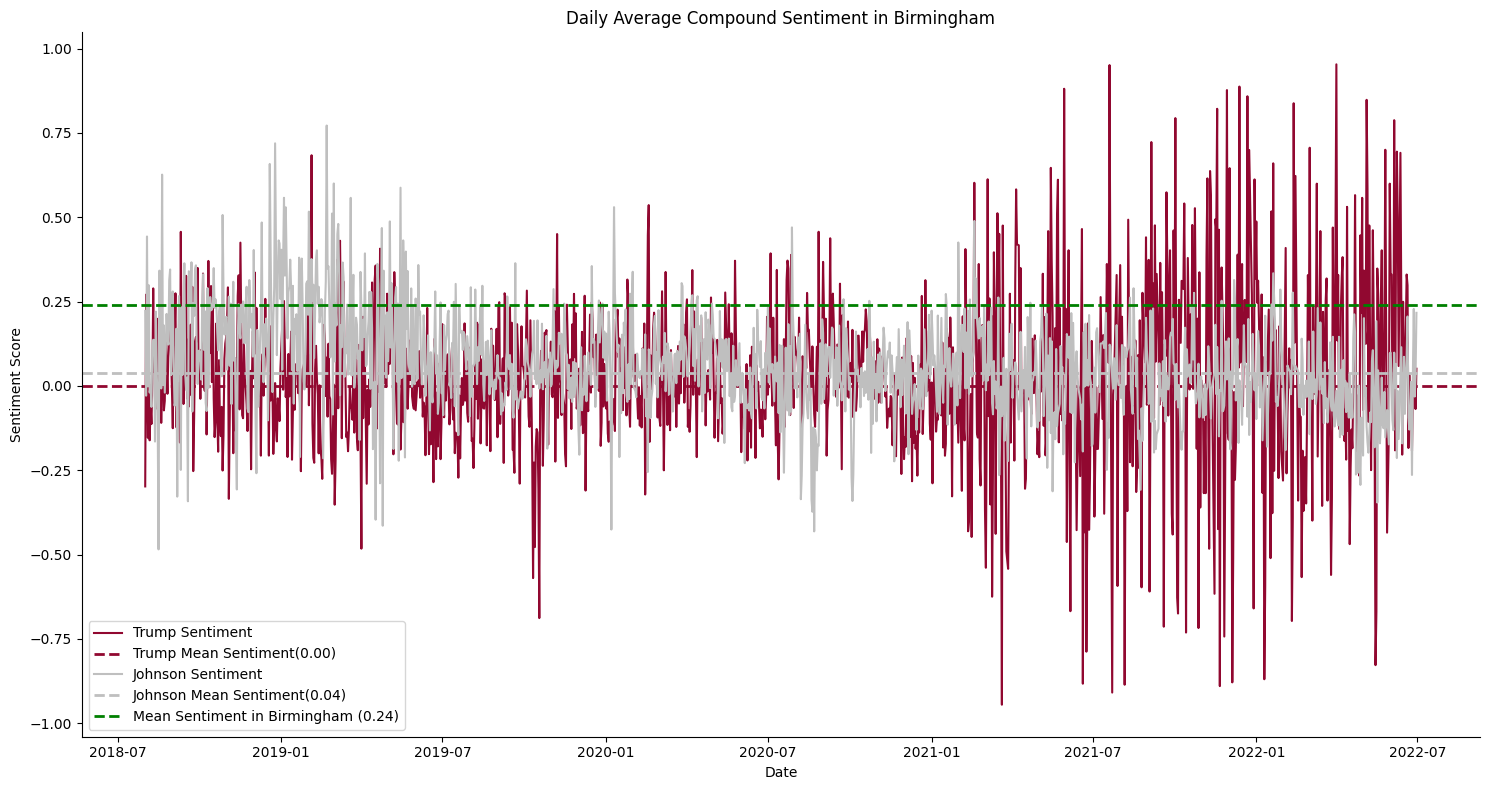

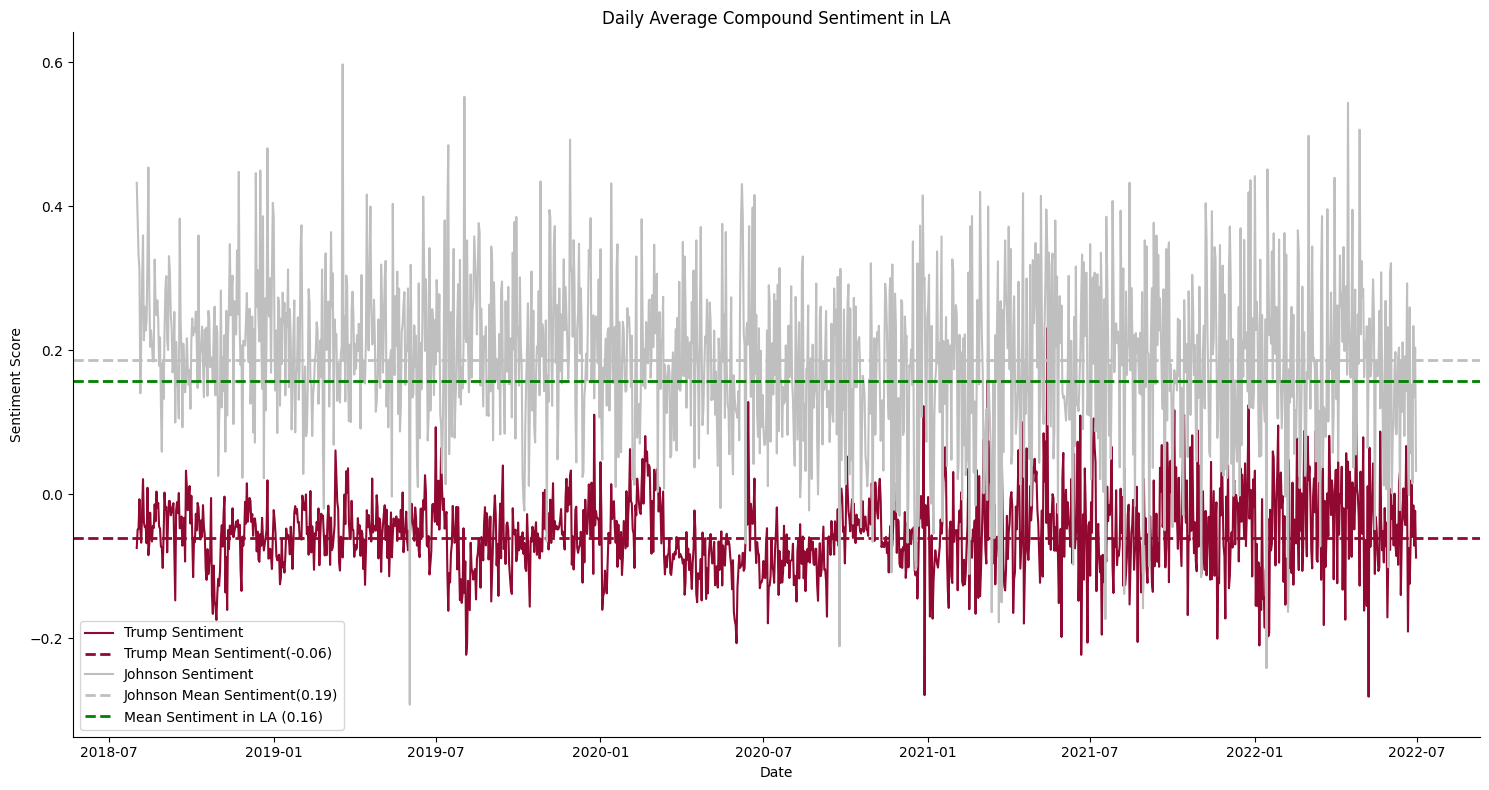

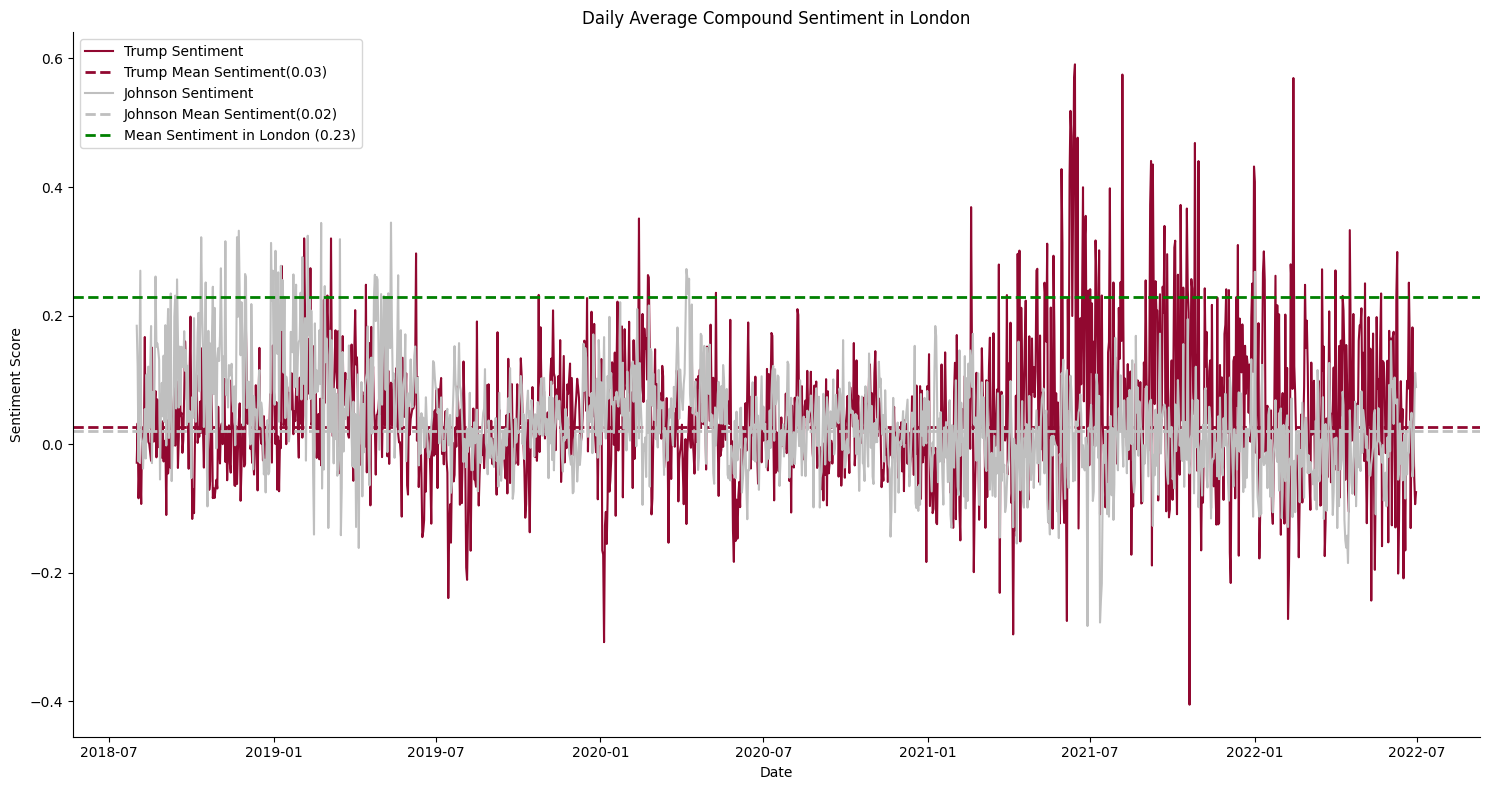

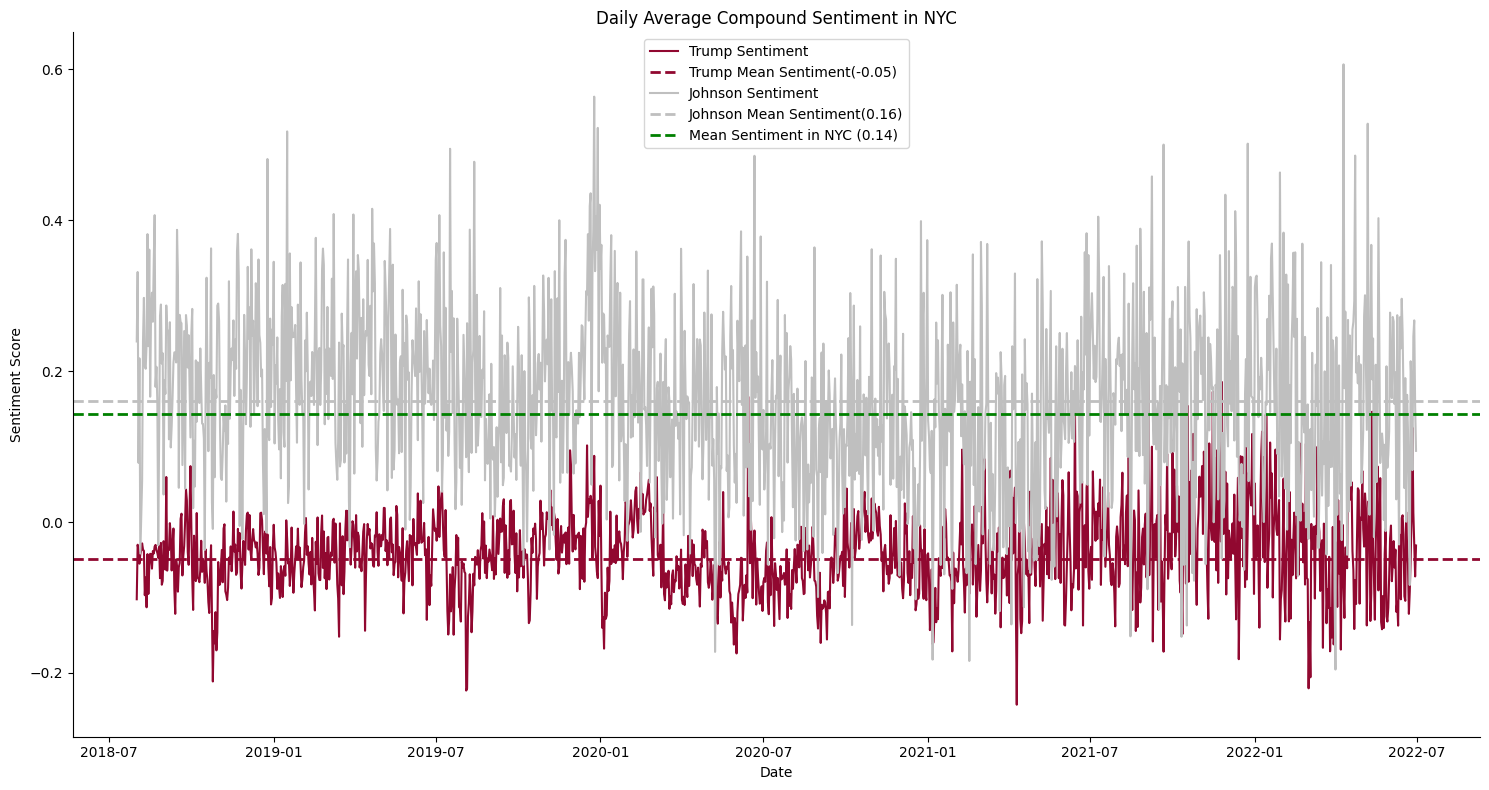

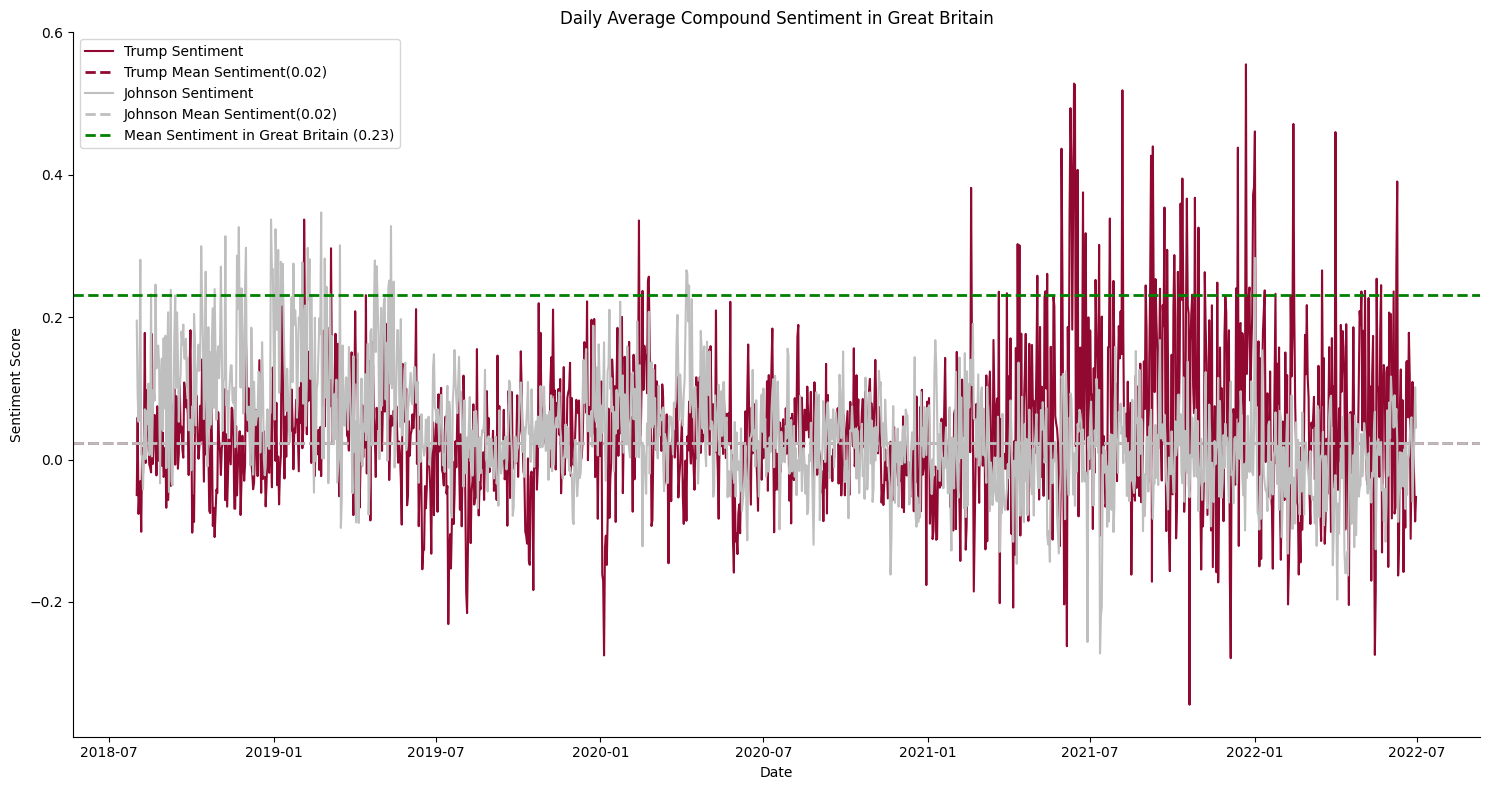

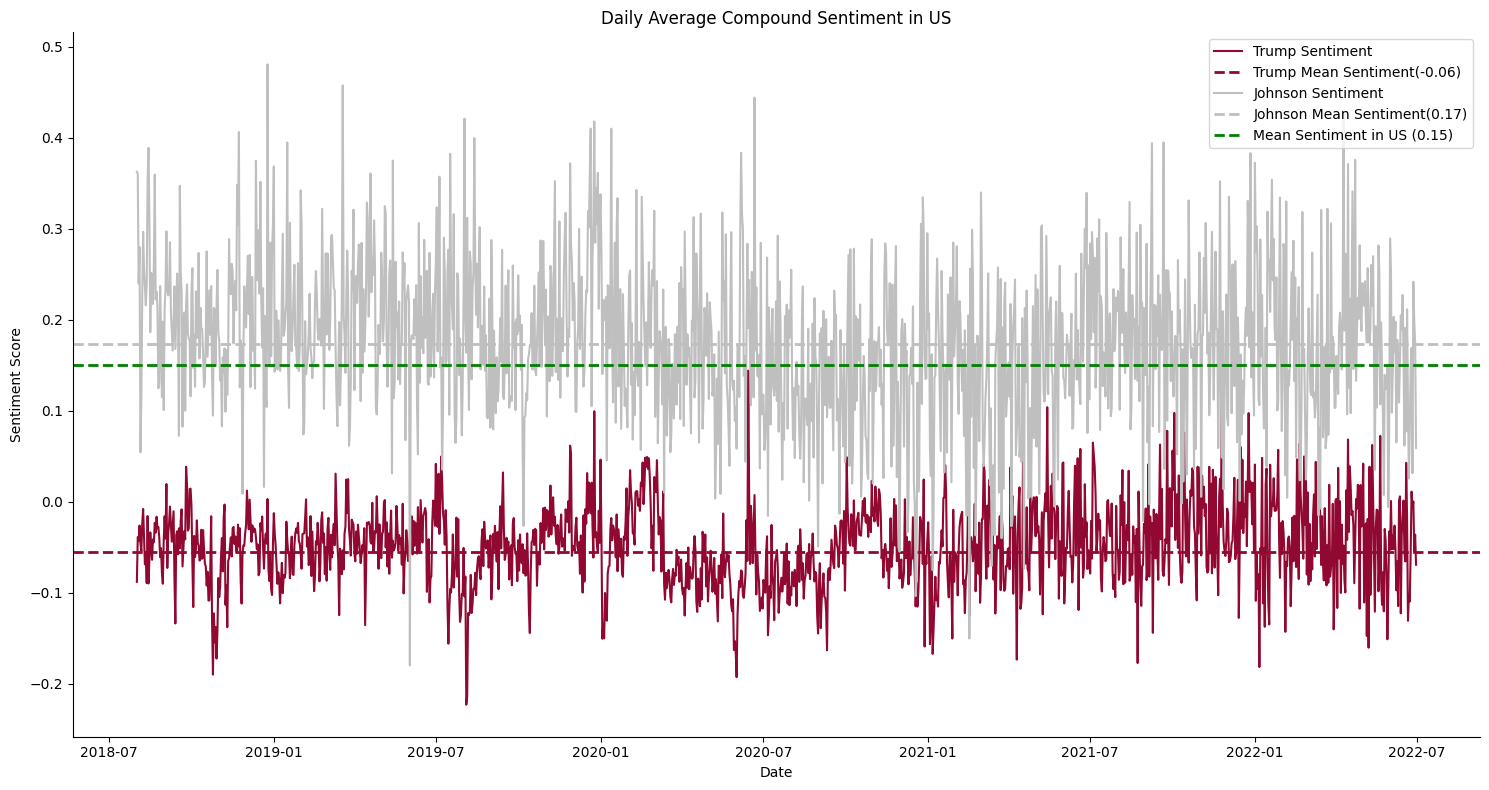

In [ ]:
for location in (cities + countries):
    title = f'Daily Average Compound Sentiment in {location}'
    filepath_trump = f'{data_path}trump-{location}.pkl'
    filepath_johnson = f'{data_path}johnson-{location}.pkl'
    trump = pd.read_pickle(filepath_trump)
    johnson = pd.read_pickle(filepath_johnson)
    trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(trump)
    johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(johnson)
    trump_average_compound = get_compound_mean(trump)
    johnson_average_compound = get_compound_mean(johnson)
    presidents_daily_sentiment = trump_daily_sentiment.rename(columns={'Compound': presidents[0]})
    presidents_daily_sentiment[presidents[1]] = johnson_daily_sentiment['Compound']
    
    plot_sentiment_with_highlights_and_timeframes(presidents_daily_sentiment,
                                            title=title,
                                            location=location,
                                            columns=['trump', 'johnson'],
                                            averages=[trump_average_compound, johnson_average_compound],
                                            mean_location=mean_compound.at['All',location],
                                            colors=colors,
                                            save_path=f'visualizations/compound_sentiment/presidents-{location}.png')

In [ ]:
trump_significant_points = {
    'Birmingham': ['2019-10', '2021-05'],
    'London': ['2021-05']
}
johnson_significant_points = {
    'Birmingham': ['2020-08', '2022-04', '2020-04', '2021-02'],
    'NYC': ['2019-12']
}
significant_points = [pd.to_datetime(significant_points).date()]

In [ ]:
def combine_city_sentiments(president):
    city_average_compound = pd.DataFrame(columns=cities, index=['average_compound'])
    city_sentiments = pd.DataFrame(columns=['day'] + cities)

    for location in cities:
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        # get mean daily sentiment
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        city_sentiments['day'] = daily_sentiment['day']
        city_sentiments[location] = daily_sentiment['Compound']
        # get mean compound sentiment
        average_compound = get_compound_mean(data)
        city_average_compound.at['average_compound', location] = average_compound
    return (city_average_compound, city_sentiments)

In [ ]:
trump_city_sentiments = combine_city_sentiments(presidents[0])
johnson_city_sentiments = combine_city_sentiments(presidents[1])